# Project 10 | Feature descriptors
Comparison of SIFT, SURF & FAST-BRIEF

# Group 21
Md Safin Sarker | B M Nafis Fuad | Abdullah Al Sajid


# Setting up enviroment

In [1]:
#Setting up the enviroment
!pip3 install numpy
!pip3 install matplotlib
!pip3 install -U opencv-contrib-python==3.4.2.16

You are using pip version 10.0.1, however version 23.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 10.0.1, however version 23.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Requirement already up-to-date: opencv-contrib-python==3.4.2.16 in c:\python 307\lib\site-packages (3.4.2.16)
Requirement not upgraded as not directly required: numpy>=1.14.5 in c:\python 307\lib\site-packages (from opencv-contrib-python==3.4.2.16) (1.21.6)


You are using pip version 10.0.1, however version 23.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
#Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time

# Implementation of Algorithms

In [3]:
def SIFT(img, nfeatures):
    img = cv2.imread(img)                           #Load Image
    imgGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  #Convert to Gray Scale
    sift = cv2.xfeatures2d.SIFT_create(nfeatures)   #Create SIFT Feature Detector
    
    # Find the keypoints and compute the descriptors with SIFT
    kp, des = sift.detectAndCompute(imgGray, None)
    
    #Draw detected keypoints on the Grayscale image
    imgKeypoints = cv2.drawKeypoints(imgGray,kp,None,flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)
    
    return imgKeypoints

In [4]:
def SURF(img, hessianThreshold): 
    img = cv2.imread(img)                                   #Load Image
    imgGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)          #Convert to Gray Scale
    surf = cv2.xfeatures2d.SURF_create(hessianThreshold)    #Create SURF Feature Detector
    keypoints = surf.detect(imgGray,None)                   #Detect Keypoints
    
    #Draw detected keypoints on the Grayscale image
    imgKeypoints = cv2.drawKeypoints(imgGray,keypoints,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    return imgKeypoints

In [5]:
def FASTBRIEF(img, thresh, blur = False):
    img = cv2.imread(img)                                           #Load Image
    imgGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)                  #Convert to Gray Scale

    # Check if blurring is requested
    if blur == True:
        imgBlur = cv2.GaussianBlur(imgGray,ksize=(11,11),sigmaX=0)  #Apply Gaussian Blur
    else:
        imgBlur = imgGray

    fast = cv2.FastFeatureDetector_create(threshold=thresh)         #Create FAST Feature Detector
    brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()       #Initiate BRIEF Descriptor/Extractor
    kp = fast.detect(imgBlur,None)                                  #Find the keypoints with FAST
    kp, des = brief.compute(imgBlur, kp)                            #Compute the Descriptors with BRIEF

    #Draw keypoints on the Blurred Grayscale image
    imgKeypoints = cv2.drawKeypoints(imgBlur,kp,None,flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)
    
    return imgKeypoints

# Comparison Function

In [6]:
def compare_keypoint_descriptor(image_path, sift_nfeatures, surf_hthreshold, fast_threshold):
    #Measure execution time for processing an image
    #SIFT
    start_time = time.time()                                #Record Start Time
    img_sift = SIFT(image_path, sift_nfeatures)             #Extract SIFT features from the image
    end_time = time.time()                                  #Record End Time
    execution_time = end_time - start_time                  #Calculate Execution Time
    print(f"Execution Time (SIFT): {execution_time} seconds")

    #SURF
    start_time = time.time()                                #Record Start Time
    img_surf = SURF(image_path, surf_hthreshold)            #Extract SURF features from the image
    end_time = time.time()                                  #Record End Time
    execution_time = end_time - start_time                  #Calculate Execution Time
    print(f"Execution Time (SURF): {execution_time} seconds")

    #FAST-BRIEF
    start_time = time.time()                                #Record Start Time
    img_fast = FASTBRIEF(image_path, fast_threshold, True)  #Extract FAST-BRIEF features from the image
    end_time = time.time()                                  #Record End Time
    execution_time = end_time - start_time                  #Calculate Execution Time
    print(f"Execution Time (FAST-BRIEF): {execution_time} seconds")

    #Plot the images
    plt.figure(figsize=(25, 10))

    plt.subplot(131)
    plt.imshow(cv2.cvtColor(img_sift, cv2.COLOR_BGR2RGB))   #Display the SIFT result
    plt.title('SIFT')

    plt.subplot(132)
    plt.imshow(cv2.cvtColor(img_surf, cv2.COLOR_BGR2RGB))   #Display the SURF result
    plt.title('SURF')

    plt.subplot(133)
    plt.imshow(cv2.cvtColor(img_fast, cv2.COLOR_BGR2RGB))   #Display the FAST-BRIEF result
    plt.title('FAST-BRIEF')

    plt.show()

# CASE 01

Execution Time (SIFT): 0.26044487953186035 seconds
Execution Time (SURF): 0.39223670959472656 seconds
Execution Time (FAST-BRIEF): 0.0534822940826416 seconds


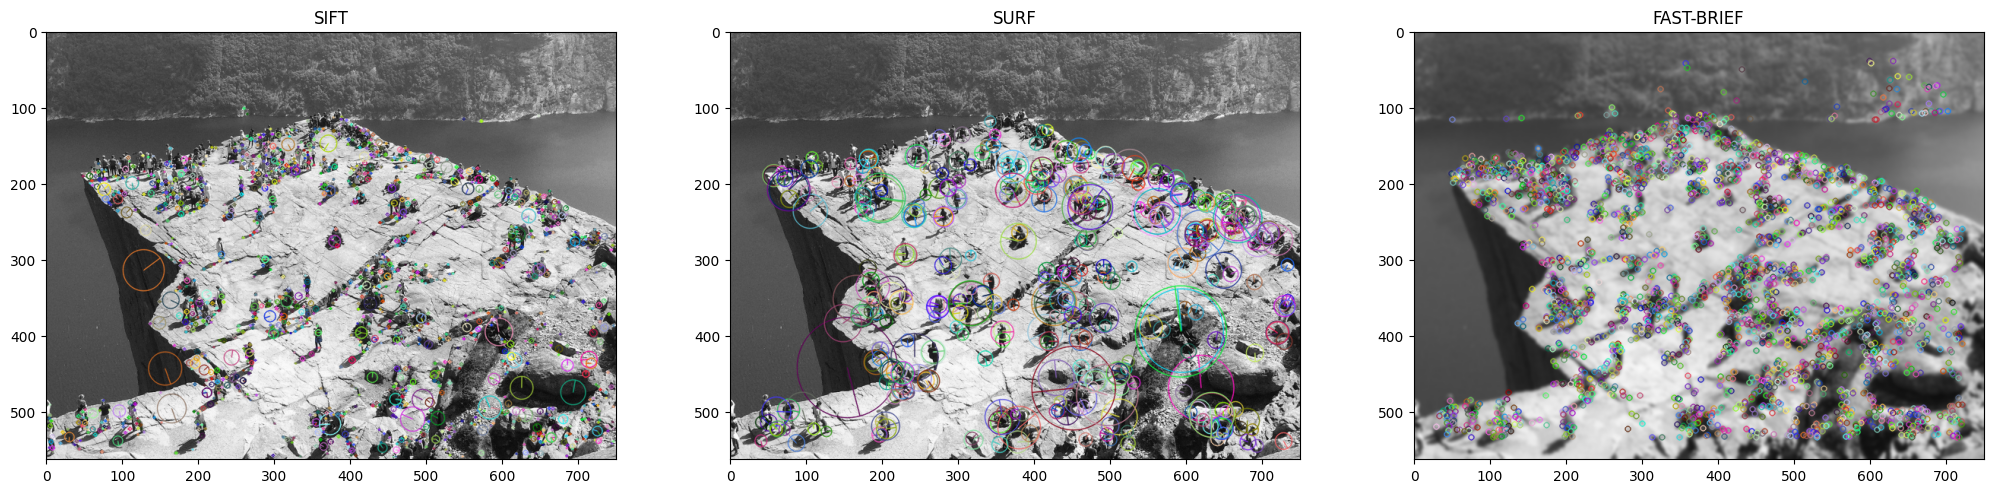

In [7]:
image_path = "preikestolen.jpg"

# Specify the parameters for each feature extraction technique
sift_nfeatures = 2000   #Number of keypoints for SIFT
surf_hthreshold = 12000 #Hessian threshold for SURF
fast_threshold = 10     #Threshold for FAST feature detection

#Comparison Function
compare_keypoint_descriptor(image_path, sift_nfeatures, surf_hthreshold, fast_threshold)

# CASE 02

Execution Time (SIFT): 0.287400484085083 seconds
Execution Time (SURF): 0.12159991264343262 seconds
Execution Time (FAST-BRIEF): 0.03865313529968262 seconds


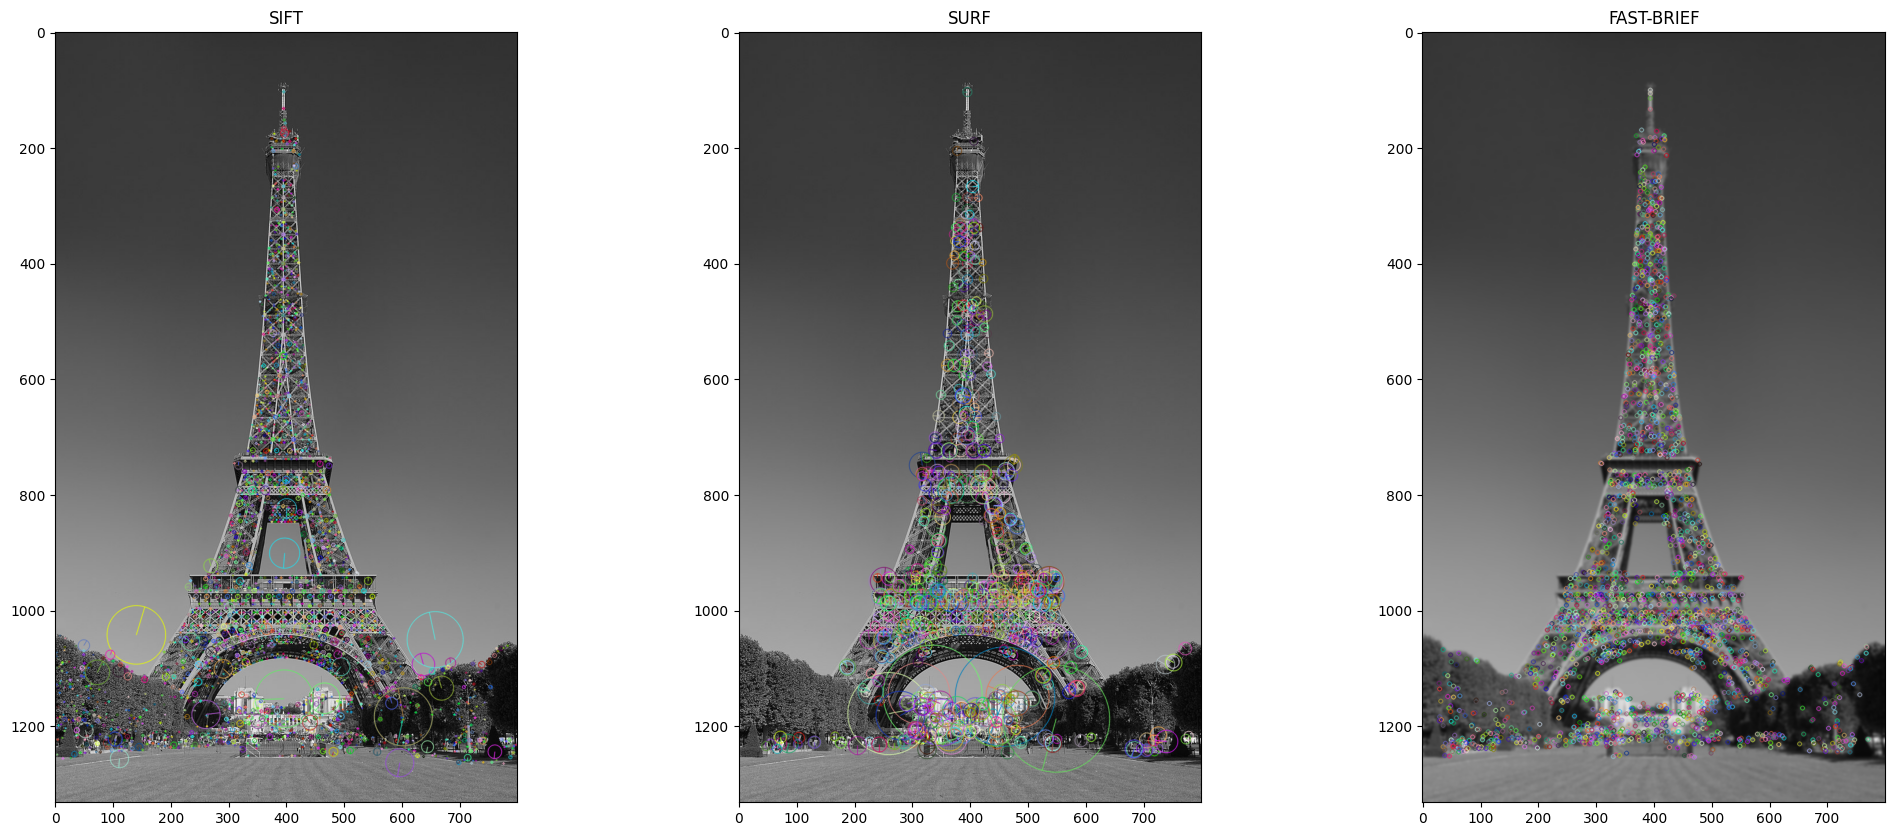

In [8]:
image_path = "eiffel.jpg"

# Specify the parameters for each feature extraction technique
sift_nfeatures = 3500   #Number of keypoints for SIFT
surf_hthreshold = 5000  #Hessian threshold for SURF
fast_threshold = 10     #Threshold for FAST feature detection

#Comparison Function
compare_keypoint_descriptor(image_path, sift_nfeatures, surf_hthreshold, fast_threshold)

# CASE 03

Execution Time (SIFT): 0.10465025901794434 seconds
Execution Time (SURF): 0.04202675819396973 seconds
Execution Time (FAST-BRIEF): 0.01497650146484375 seconds


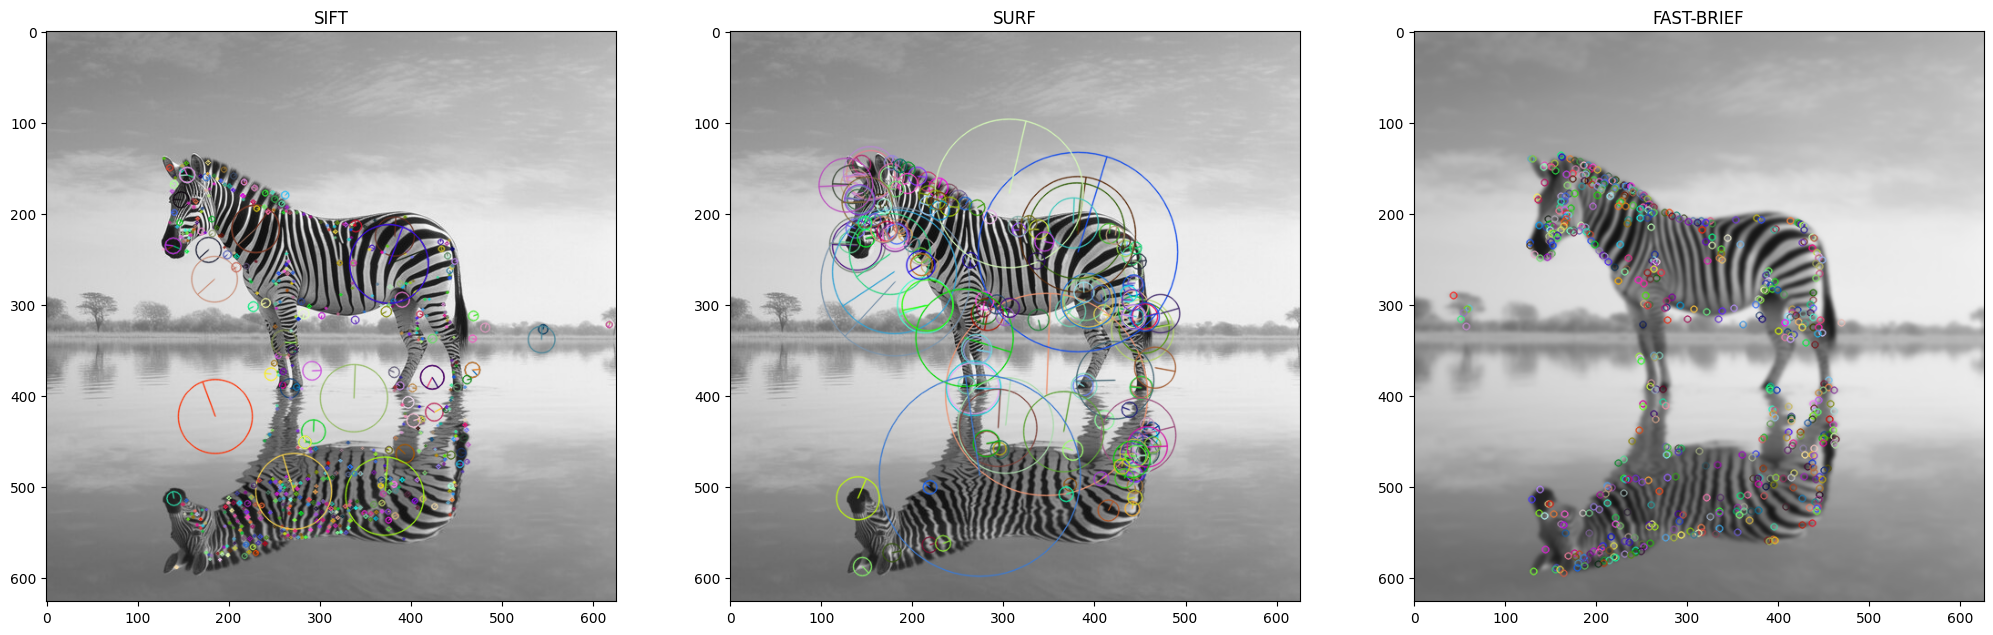

In [9]:
image_path = "zebra.jpg"

# Specify the parameters for each feature extraction technique
sift_nfeatures = 800    #Number of keypoints for SIFT
surf_hthreshold = 5000  #Hessian threshold for SURF
fast_threshold = 10     #Threshold for FAST feature detection

#Comparison Function
compare_keypoint_descriptor(image_path, sift_nfeatures, surf_hthreshold, fast_threshold)

# Other Trial Cases

Execution Time (SIFT): 0.18053865432739258 seconds
Execution Time (SURF): 0.07850289344787598 seconds
Execution Time (FAST-BRIEF): 0.020000457763671875 seconds


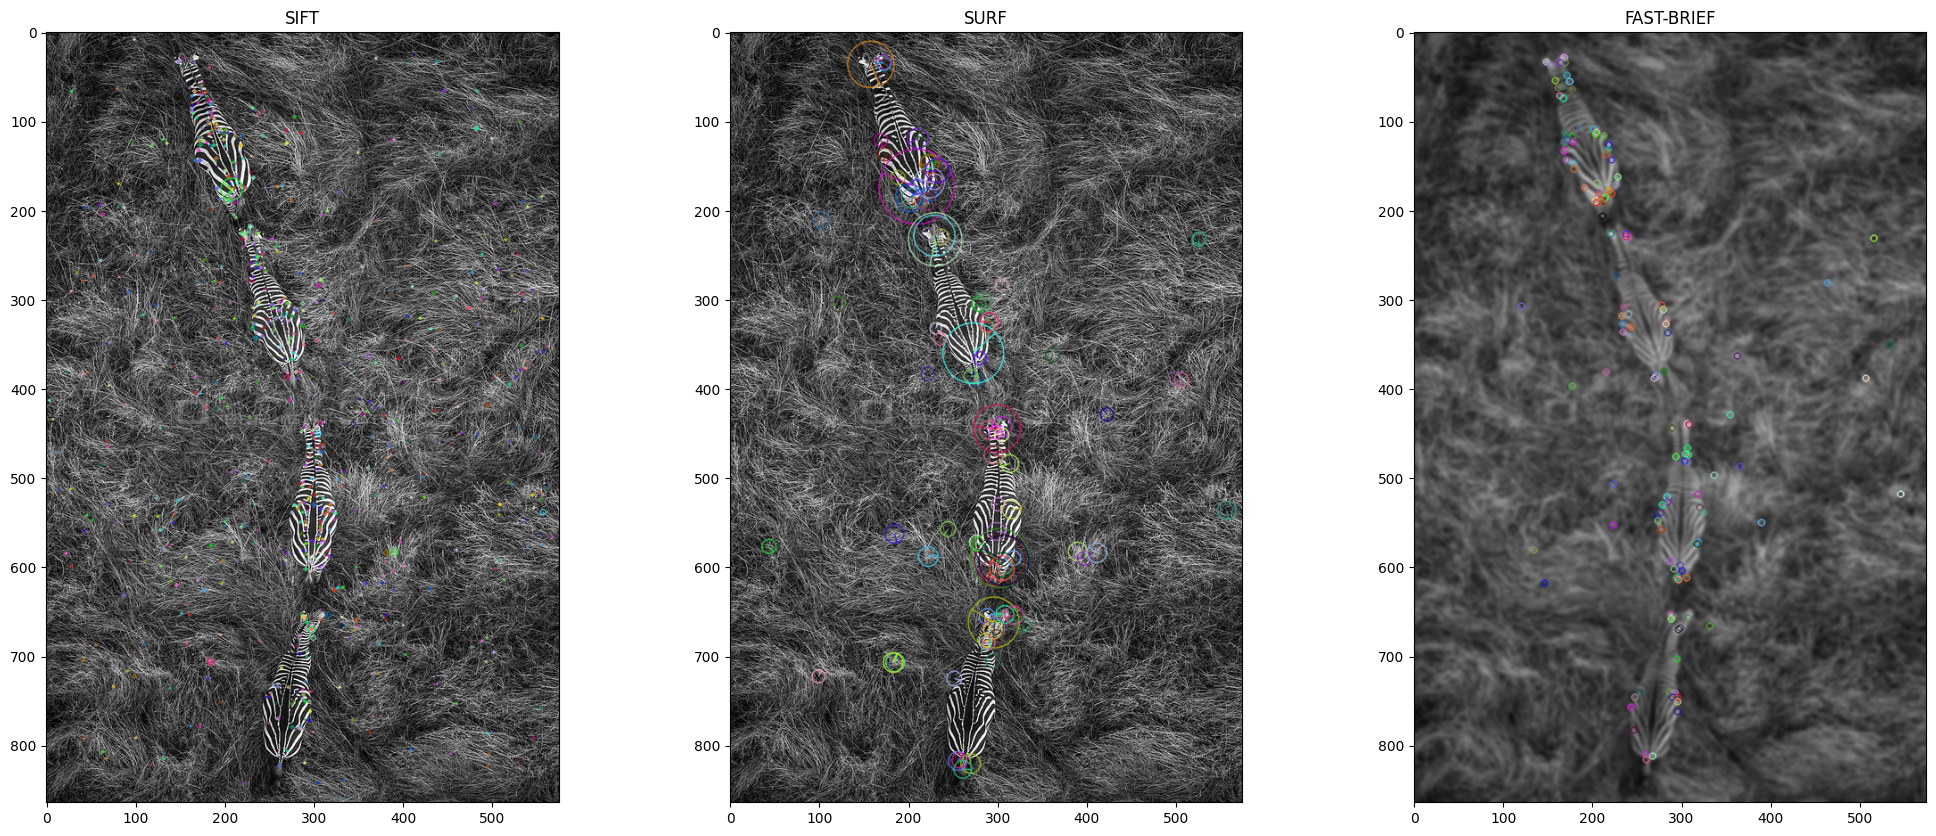

In [10]:
image_path = "zebras.jpg"

# Specify the parameters for each feature extraction technique
sift_nfeatures = 1000   #Number of keypoints for SIFT
surf_hthreshold = 4000  #Hessian threshold for SURF
fast_threshold = 18     #Threshold for FAST feature detection

#Comparison Function
compare_keypoint_descriptor(image_path, sift_nfeatures, surf_hthreshold, fast_threshold)

Execution Time (SIFT): 0.08275771141052246 seconds
Execution Time (SURF): 0.03215527534484863 seconds
Execution Time (FAST-BRIEF): 0.0064775943756103516 seconds


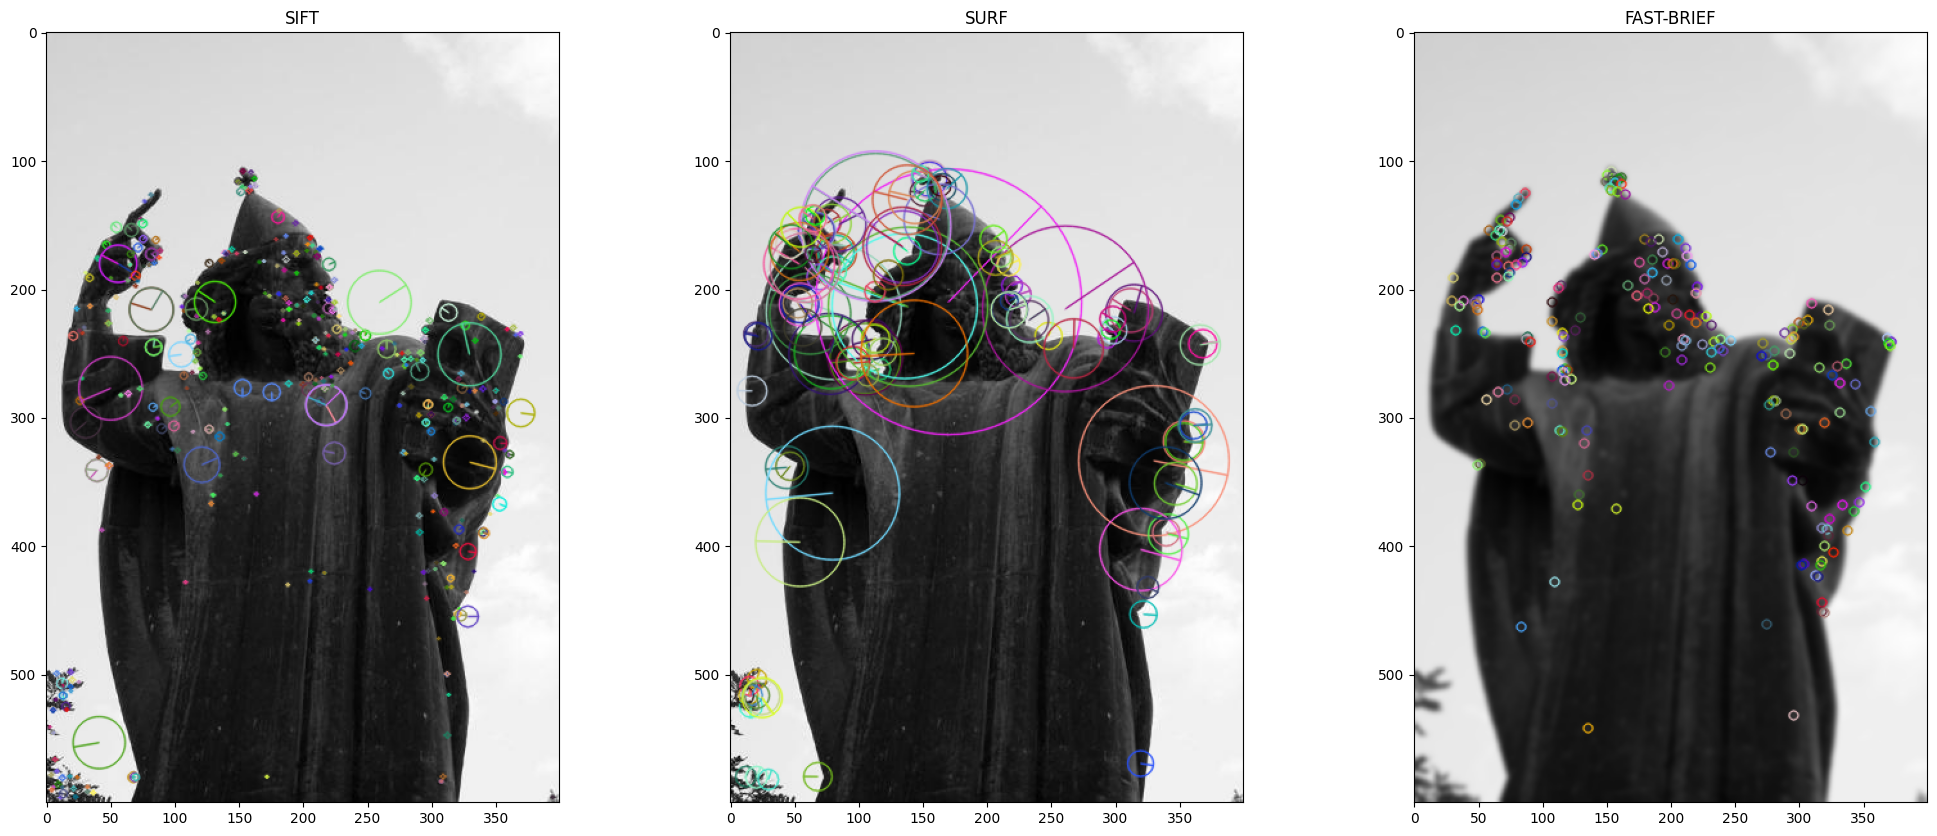

In [11]:
image_path = "gregoryofnin.jpg"

# Specify the parameters for each feature extraction technique
sift_nfeatures = 1000   #Number of keypoints for SIFT
surf_hthreshold = 3000  #Hessian threshold for SURF
fast_threshold = 5      #Threshold for FAST feature detection

#Comparison Function
compare_keypoint_descriptor(image_path, sift_nfeatures, surf_hthreshold, fast_threshold)